# Making plots for analysis
This is an auxiliary notebook which we include just because we often make our own functions and you may wonder what's contained in these analyses.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime
import pandas as pd
import os
import matplotlib.image as mpimg
import collections
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as img
import numpy as np
# from scipy.misc import imresize
import matplotlib.image as mpimg
%matplotlib inline

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input

Using TensorFlow backend.


In [4]:
# Ignore  the warnings
import warnings
# warnings.filterwarnings('always')
# warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.utils import shuffle
import sklearn as sklearn

In [5]:
import tensorflow as tf


In [6]:
from keras.applications import ResNet50, inception_resnet_v2, inception_v3, resnet, resnet_v2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [7]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, GaussianNoise, Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD, adam
from keras.regularizers import l2
import keras.backend as K
import math

K.clear_session()


# Kaggle Submission Timeline

In [8]:
date1 = datetime.datetime(2020, 4, 7, 0, 0)

In [9]:
hr = 2*datetime.timedelta(hours=1.0)
day = datetime.timedelta(days=1.0)

In [54]:
formatter = DateFormatter('%m/%d')

In [152]:
date2 = date1+day
date3 = date2+3*day
date4 = date3+2*day
date5 = date4+day
date6 = date5+day
date7 = date6+day
date8 = date7+day
date9 = date8+3*day
date10 = datetime.datetime(2020, 4, 23, 0, 0)
date11 = datetime.datetime(2020, 4, 24, 0, 0)
dates = [date1, date1+hr, 
         date2, date2+hr, date2+2*hr, date2+3*hr, date2+4*hr, date2+5*hr, 
         date3, 
         date4,
         date5, 
         date6, date6+hr, date6+2*hr, date6+3*hr, date6+4*hr,
         date7,
         date8, date8+hr,
         date9, date9+hr, date9+2*hr, date9+3*hr, date9+4*hr,
         date10,
         date11,
         datetime.datetime(2020, 4, 24, 12, 0), datetime.datetime(2020, 4, 24, 17, 0)
        ]

In [153]:
scores = np.array([1.0, 1.0, 0.98848, .99212, .98672, .98778, 
          .44778,0.24245,0.22401, 0.20392, 0.22459, 0.42664, 0.31633, 0.21390, 0.21390, 
          0.19017, 0.15846, 0.16046, 0.16915, 0.14636, 0.14331, 0.14178, 0.14013, 
         0.13215, 0.12310,
                  0.11641,
                  0.11171, 0.10748])
nl_scores = np.log(scores)

In [51]:
date = datetime.datetime(2020, 4, 7, 0, 0)
def addscore(score, date, savefig=True):
    global scores
    scores = np.append(scores, score)
    np_scores = np.log(scores)
    dates.append(date)
    if savefig:
        kaggle()

In [158]:
def kaggle():
    fig, ax = plt.subplots(figsize=(9,5))
    plt.plot_date(dates[:6], nl_scores[:6], label='Early attempts', ms=8, marker='x')
    plt.plot_date(dates[6:9], nl_scores[6:9], label='Inception Variations', ms=8, marker='x')
    plt.plot_date(dates[9:15], nl_scores[9:15], label='Resnet Variations', ms=8, marker='o')
    plt.plot_date(dates[15:22], nl_scores[15:22], label='IRv2: 256 Input', ms=8, marker='v')
    plt.plot_date(dates[22:24], nl_scores[22:24], label='IRv2: 299 Input', ms=8, marker='^')
    plt.plot_date(dates[24:], nl_scores[24:], label='IRv2 Ensembles', ms=10, marker='d')

    ax.set_xlabel('Submission Date', fontdict={'fontsize': 'xx-large'})
    ax.set_ylabel('ln(top-3 error)', fontdict={'fontsize': 'xx-large'})

    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_title('Kaggle Submission Score History', fontdict={'fontsize': 'xx-large'})
    ax.legend(ncol=2, fontsize='large')
    ax.grid()
    plt.savefig('plots/kagglehistory.png')
    plt.show()

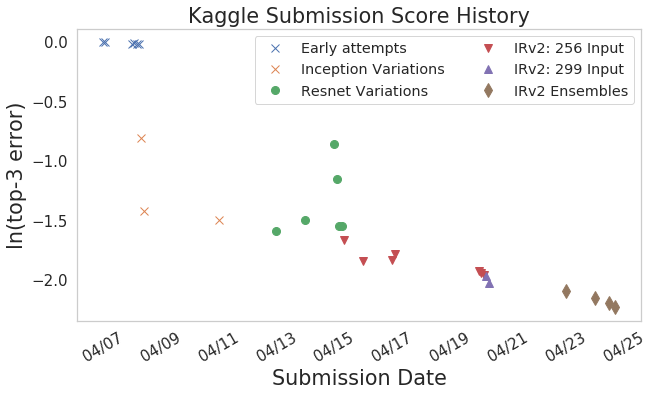

In [159]:
kaggle()

# Augmentation images

In [41]:

#generator prepp, should be for now same for all things. 
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0 #False best
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180) best model:20
    width_shift_range= 0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range= 0.2,  # randomly shift images vertically (fraction of total height)
    brightness_range=[0.5,1.3], #List of values to pick brightness from 
    zoom_range=0.1, #Scale to 1+zr and 1-zr to account for different zooms  #best 0.1
    horizontal_flip=True, # True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    channel_shift_range=0, # 30,
    fill_mode='nearest')#'reflect')

test_datagen = ImageDataGenerator(
    rescale=1/255.,)
# train_datagen.fit(X_fit[:1000, :, :, :])
# test_datagen.fit(X_val)
# train_datagen.config['random_crop_size'] = (299, 299)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="input/train_set/",
    x_col="img_name",
    y_col="label",
    batch_size=32,
    seed=None,
    shuffle=True,
    class_mode="categorical",
    target_size=(299,299))

test_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="input/val_set/",
    x_col="img_name",
    y_col="label",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(299,299))

Found 118300 validated image filenames belonging to 251 classes.
Found 11994 validated image filenames belonging to 251 classes.


In [43]:
xtrain, ytrain = next(train_generator)
key_list = list(test_generator.class_indices.keys())
val_list = list(test_generator.class_indices.values())

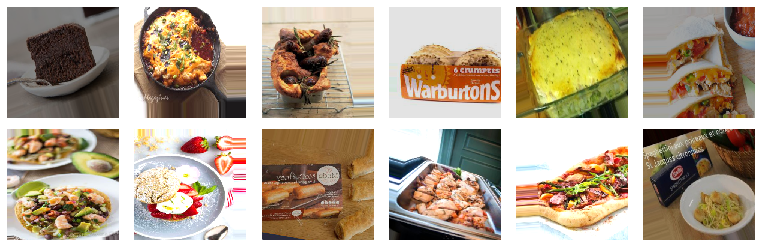

In [44]:
nrows = 2
ncols = 6
page_size = nrows*ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
fig.set_size_inches(12, 4)
# fig.patch.set_facecolor(None)
#fig.tight_layout()
#imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
page=0
start_i = page * page_size

for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.title.set_visible(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    x=xtrain[i]
    y=ytrain[i]
#     img=x
#     x = np.expand_dims(x, axis=0)  
    

    ax.imshow(x, aspect='equal')

fig.subplots_adjust(left=None, wspace=0.1, hspace=0.1)
# fig.patch.set_facecolor('xkcd:mint green')
fig.savefig('plots/augmented2.png', transparent=True)
fig.show()

# Right vs wrong predictions

In [10]:
class_to_ix = {}
ix_to_class = {}
with open('input/class_list.txt', 'r') as txt:
    classes = [l.strip() for l in txt.readlines()]
    class_to_ix = dict(zip(classes, range(len(classes))))
    ix_to_class = dict(zip(range(len(classes)), classes))
    class_to_ix = {v: k for k, v in ix_to_class.items()}
sorted_class_to_ix = collections.OrderedDict(sorted(class_to_ix.items()))

In [144]:
train_dir = 'input/train_set/'

val_dir = 'input/val_set/'
train_df = pd.read_csv('/home/reallsx/mlproj/input/train_labels_cleaned.csv')
train_df['path'] = train_df['img_name'].map(lambda x: os.path.join(train_dir,x))
val_df = pd.read_csv('./input/val_labels.csv')
val_df['path'] = val_df['img_name'].map(lambda x: os.path.join(val_dir,x))
val_df['label'] = val_df['label'].astype(str)
train_df['label'] = train_df['label'].astype(str)

In [115]:
val_df.head()

img_name label                          path
0  val_010323.jpg   247  input/val_set/val_010323.jpg
1  val_010324.jpg   234  input/val_set/val_010324.jpg
2  val_010325.jpg   222  input/val_set/val_010325.jpg
3  val_010326.jpg   240  input/val_set/val_010326.jpg
4  val_010327.jpg   218  input/val_set/val_010327.jpg

In [120]:
df_val = val_df

In [128]:
ix_to_class[0]

'0 macaron'

In [514]:
model_name = '299_val'
pred_data = pd.read_csv('val_preds/' + model_name +  '.csv') 
pred_data.head()

Unnamed: 0        img_name  label  new_index  old_index       labelS  guess
0        1812  val_000000.jpg    142          0       1812   142 75 180    142
1        1813  val_000001.jpg    127          1       1813  174 143 127    174
2        1814  val_000002.jpg    129          2       1814    129 13 90    129
3        1815  val_000003.jpg    126          3       1815  126 103 208    126
4        1816  val_000004.jpg    209          4       1816    209 58 46    209

In [ ]:
preds = 

'142 75 180'

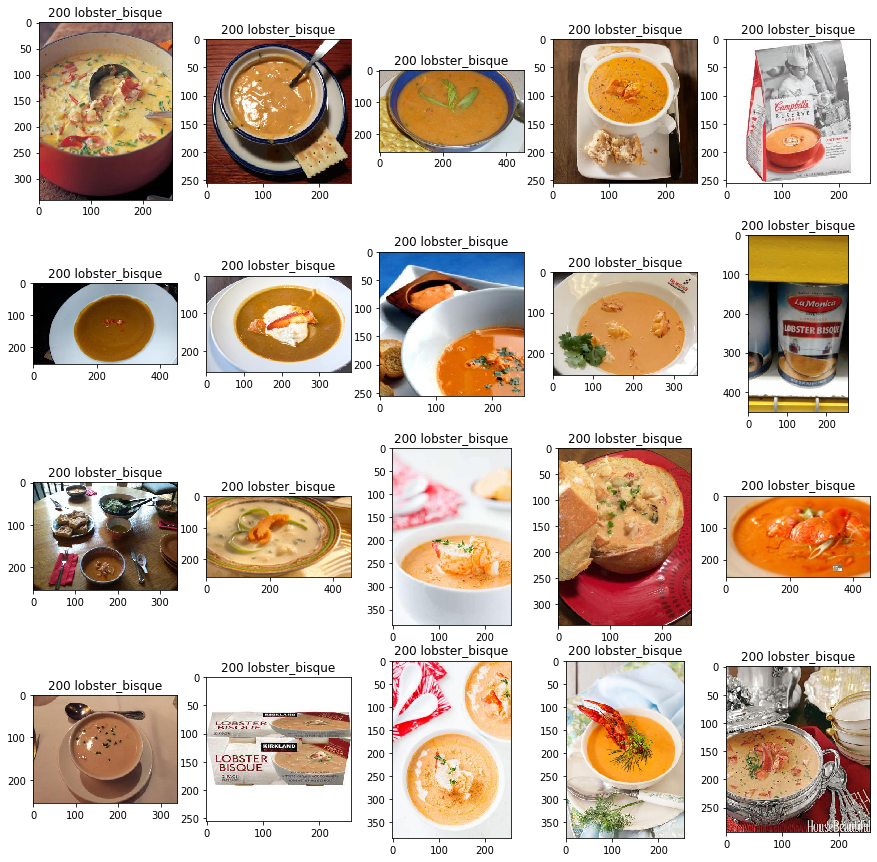

In [129]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
this_label = df_val[df_val['label']=='200']
for i in range(1, columns*rows +1):
    img = mpimg.imread(val_dir + this_label.iloc[i]['img_name'])
    fig.add_subplot(rows, columns, i, title=ix_to_class[int(this_label.iloc[i]['label'])])    
    plt.imshow(img, aspect='equal')

In [153]:
y_test =  this_label['label'].astype(int)
y_pred = this_label['label'].astype(int)

In [231]:
num[145]

43

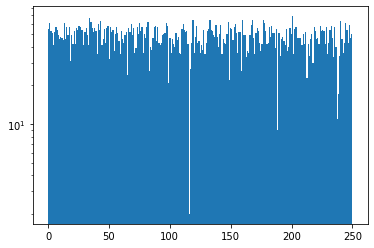

In [235]:
plt.hist(val_df['label'].astype(int), bins = 251)
plt.yscale('log')
plt.show()

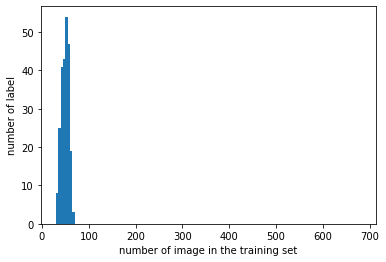

In [559]:
num = []
for i in range(251):
    num.append(len(val_df[val_df['label']==str(i)]))
totals = np.asarray(num)
nu = np.array(num)
plt.hist(nu, range = (30,680), bins = 130)
plt.xlabel('number of image in the training set')
plt.ylabel('number of label')
plt.show()

In [390]:
value

'200 135 197'

In [120]:
def show_images_prediction(page=0, true_label='200', model_type='temp'):
    this_label = pred_data[pred_data['label']==int(true_label)] #All images with this label true
    y_pred = this_label['labelS']
    indices = y_pred.index
    nrows = 2
    ncols = 6
    page_size = nrows*ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
    fig.set_size_inches(12, 5)
    fig.tight_layout()
    #imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
    start_i = page * page_size
    for i, ax in enumerate(axes.flat):
        img = mpimg.imread(val_dir + this_label.iloc[i+start_i]['img_name'])
        
        im = ax.imshow(img, aspect='equal')
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        
        
        value = y_pred.iloc[i+start_i]
        predicted = ix_to_class[int(value.rsplit(' ', 2)[0])] # map to a string
        
        match = true_label + ' ' in value or ' ' + true_label in value
            #  ix_to_class[y_test[y_pred.index[start_i + i]]]
        ec = (1, .5, .5)
        fc = (1, .8, .8)
        if match:
            ec = (0, .6, .1)
            fc = (0, .7, .2)
        # predicted label
        ax.text(0, -50, 'P: ' + predicted, size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )
        if not match:
            # true label
            ax.text(0, img.shape[0], 'A: ' + ix_to_class[int(true_label)], size=10, rotation=0,
                ha="left", va="top",
                 bbox=dict(boxstyle="round",
                       ec=ec,
                       fc=fc,
                       )
                 )
    plt.subplots_adjust(left=0, wspace=0.2, hspace=0.2)
    plt.savefig('plots/'+model_type+true_label+'_performance.png')
    plt.show()

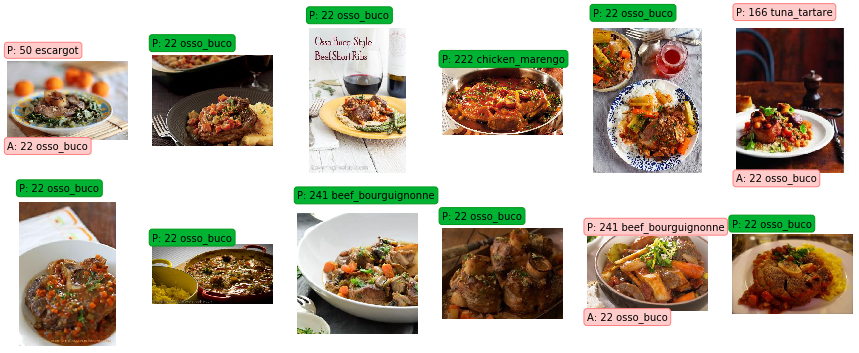

In [708]:
show_images_prediction(page=0, true_label='22')

## Observations
- 100 sloppy joe: shows how when things are pretty regulated in the set, it performs well
- 21 cupcake: really accurate, as shape/edges/bright colors are so typical . Even gets cupcake towers!
- 118 bacon and eggs: the other likely predictions tend to be other similar breakfast foods like ham and  eggs, so the model is learning to group similar foods together

## "Confusion matrix" style of misclassifications within top-3
Shows if it is clustering things 

## Confusion matrix of true out of top-3 error 

In [94]:
val299 = pd.read_csv('/home/reallsx/299_val.csv')
val_ensemble =pd.read_csv('/home/reallsx/ensemble_val.csv')
val256 = pd.read_csv('/home/reallsx/256_val.csv')


In [62]:
val256.head()

label                            path        img_name  label.1  new_index  \
0    247  ./input/val_set/val_010323.jpg  val_010323.jpg      247      10182   
1    234  ./input/val_set/val_010324.jpg  val_010324.jpg      234      10183   
2    222  ./input/val_set/val_010325.jpg  val_010325.jpg      222      10184   
3    240  ./input/val_set/val_010326.jpg  val_010326.jpg      240      10185   
4    218  ./input/val_set/val_010327.jpg  val_010327.jpg      218      10186   

   old_index       labelS  guess  
0          0    247 156 2    247  
1          1  234 132 137    234  
2          2  222 228 122    222  
3          3  206 240 122    206  
4          4  218 195 191    218

In [124]:
pred_data = val299
pred_data.head()

Unnamed: 0        img_name  label  new_index  old_index       labelS  guess
0        1812  val_000000.jpg    142          0       1812   142 75 180    142
1        1813  val_000001.jpg    127          1       1813  174 143 127    174
2        1814  val_000002.jpg    129          2       1814    129 13 90    129
3        1815  val_000003.jpg    126          3       1815  126 103 208    126
4        1816  val_000004.jpg    209          4       1816    209 58 46    209

In [125]:
preds = pred_data['labelS']

In [126]:
guesses = np.zeros((pred_data.shape[0], 3))
for i, pred in enumerate(preds):
    guesses[i] = str.split(pred, sep =' ', )

In [127]:
guesses = guesses.astype(int)

In [128]:
y_true = pred_data['label']

In [129]:
pred_data['label'][0]

142

In [111]:
num = []
for i in range(251):
    num.append(len(pred_data[pred_data['label']==i]))
totals = np.asarray(num)
totals

array([55, 61, 53, 51, 41, 52, 57, 54, 49, 46, 48, 47, 45, 61, 46, 57, 49,
       57, 31, 49, 42, 53, 42, 56, 54, 58, 57, 54, 54, 41, 52, 56, 49, 41,
       67, 62, 56, 52, 56, 53, 35, 60, 54, 63, 41, 46, 55, 43, 56, 58, 32,
       57, 52, 54, 37, 50, 57, 51, 44, 35, 53, 46, 43, 49, 52, 24, 56, 52,
       60, 49, 56, 36, 39, 57, 50, 61, 53, 57, 36, 50, 47, 57, 62, 26, 40,
       38, 47, 57, 58, 44, 57, 43, 41, 43, 49, 50, 51, 61, 58, 21, 47, 36,
       46, 42, 40, 51, 45, 48, 36, 35, 55, 60, 54, 52, 53, 42,  2, 27, 43,
       64, 36, 48, 58, 43, 44, 36, 41, 38, 54, 35, 43, 53, 55, 64, 54, 53,
       49, 48, 59, 48, 40, 50, 59, 35, 46, 43, 42, 50, 62, 22, 56, 55, 45,
       57, 60, 51, 36, 52, 52, 26, 64, 49, 49, 33, 37, 36, 49, 59, 65, 47,
       35, 51, 56, 53, 43, 37, 42, 64, 61, 53, 42, 43, 57, 48, 58, 51, 51,
       39, 55,  9, 51, 34, 46, 48, 44, 41, 55, 37, 40, 56, 50, 69, 35, 55,
       57, 47, 47, 47, 47, 41, 50, 42, 52, 23, 42, 34, 46, 50, 30, 57, 53,
       46, 47, 42, 58, 53

In [130]:

def classwise_error_rate():
    good=0
    bad=0
    error_rate = np.zeros(251)
    y_true = pred_data['label'] #All images with this label true
    y_preds = guesses
#     y_preds = 
#     indices = y_pred.index
    for i, true in enumerate(y_true):
        if true in y_preds[i]:
            good +=1
        else:
            error_rate[true]+=1
    error_rate = np.divide(error_rate, totals)
    return error_rate

In [131]:
val_error_rates299 = classwise_error_rate()

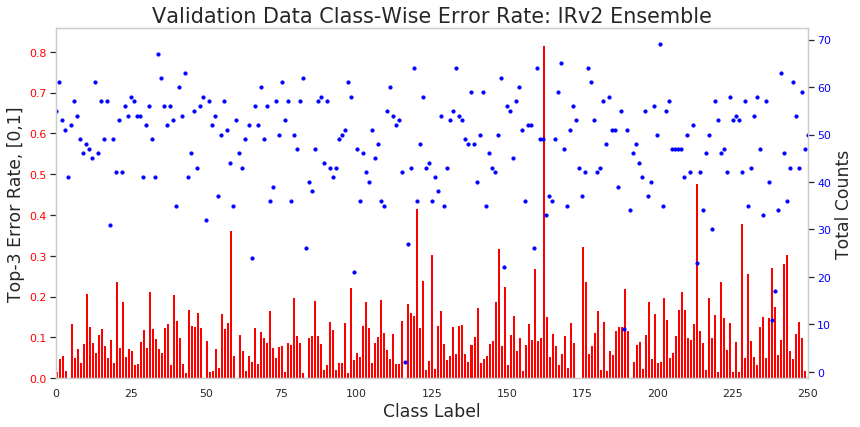

In [142]:
def two_scales(ax1, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.bar(np.arange(251), height=val_error_rates, width=1, color=c1)
    ax1.set_xlabel("Class Label", fontdict={'fontsize': 'x-large'})
    ax1.set_ylabel("Top-3 Error Rate, [0,1]", fontdict={'fontsize': 'x-large'})
    ax1.grid()
    ax2.grid()
    ax2.scatter(np.arange(251), totals, color=c2, s=10)
    ax2.set_ylabel('Total Counts', fontdict={'fontsize': 'x-large'})
    return ax1, ax2





# Create axes
fig, ax = plt.subplots(figsize=(12, 6))

ax1, ax2 = two_scales(ax, 'red', 'blue')
plt.title("Validation Data Class-Wise Error Rate: IRv2 Ensemble", fontdict={'fontsize': 'xx-large'})
plt.xticks(ticks=np.arange(0,251,25))
plt.xlim(0, 250)
# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'red')
color_y_axis(ax2, 'blue')
fig.savefig('plots/val_errorsTEMP_ens.png', transparent=True)
plt.show()

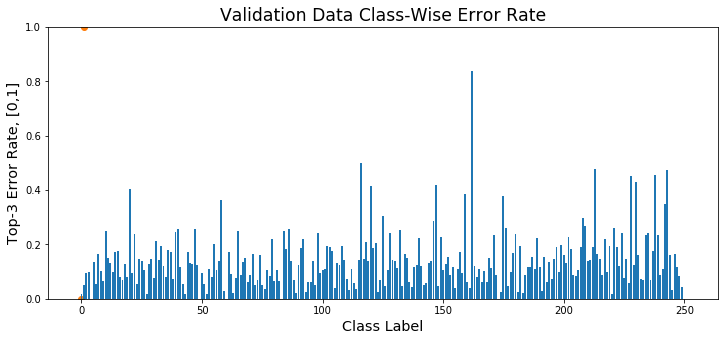

In [588]:
plt.figure(figsize=(12, 5))
plt.title("Validation Data Class-Wise Error Rate", fontdict={'fontsize': 'xx-large'})
plt.xlabel("Class Label", fontdict={'fontsize': 'x-large'})
plt.ylabel("Top-3 Error Rate, [0,1]", fontdict={'fontsize': 'x-large'})
plt.bar(np.arange(0,251), height=val_error_rates)
plt.scatter(np.arange(0,251), np.arange(0,251))
plt.ylim(0, 1)
plt.show()

In [145]:
train_df['label'][0]

'211'

In [147]:
num = []
for i in range(251):
    num.append(len(train_df[train_df['label']==str(i)]))
train_totals = np.asarray(num)
np.argmin(train_totals)

162

In [161]:
num = []
for i in range(251):
    num.append(len(train_df[train_df['label']==str(i)]))
train_totals = np.asarray(num)
np.min(train_totals)

34

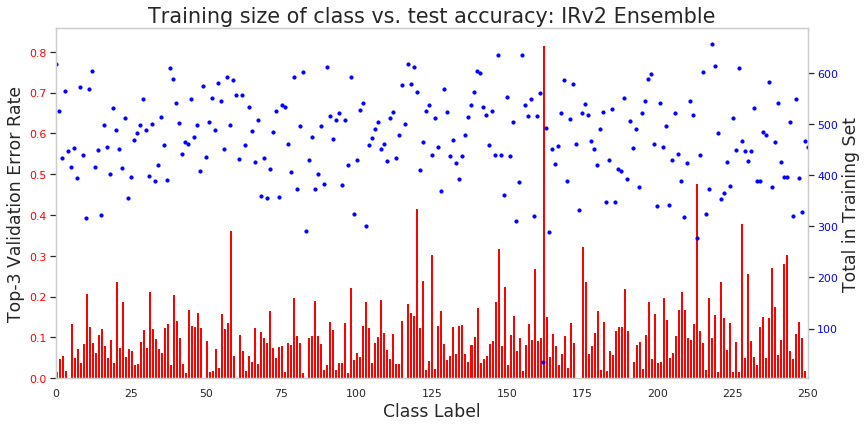

In [151]:
def two_scales(ax1, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.bar(np.arange(251), height=data1, width=1, color=c1)
    ax1.set_xlabel("Class Label", fontdict={'fontsize': 'x-large'})
    ax1.set_ylabel("Top-3 Validation Error Rate", fontdict={'fontsize': 'x-large'})
    ax1.grid()
    ax2.grid()
    ax2.scatter(np.arange(251), data2, color=c2, s=10)
    ax2.set_ylabel('Total in Training Set', fontdict={'fontsize': 'x-large'})
    return ax1, ax2





# Create axes
fig, ax = plt.subplots(figsize=(12, 6))

ax1, ax2 = two_scales(ax, val_error_rates, train_totals,'red', 'blue')
plt.title("Training size of class vs. test accuracy: IRv2 Ensemble", fontdict={'fontsize': 'xx-large'})
plt.xticks(ticks=np.arange(0,251,25))
plt.xlim(0, 250)
# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'red')
color_y_axis(ax2, 'blue')
fig.savefig('plots/numvsscore_ens.png', transparent=True)
plt.show()

## Choosing the worst classes to predict on 

In [115]:
worst_classes = np.argsort(val_error_rates)

In [160]:
this_class = worst_classes[-1]


print("Error rate on class", this_class, ":", val_error_rates[this_class]) #oof 
print("Val number seen: ", totals[this_class])

Error rate on class 162 : 0.8163265306122449
Val number seen:  49


In [140]:
print("Error rate on class", this_class299, ":", val_error_rates299[this_class299]) #oof 
print("Val number seen: ", totals[this_class299])

Error rate on class 213 : 0.4782608695652174
Val number seen:  23


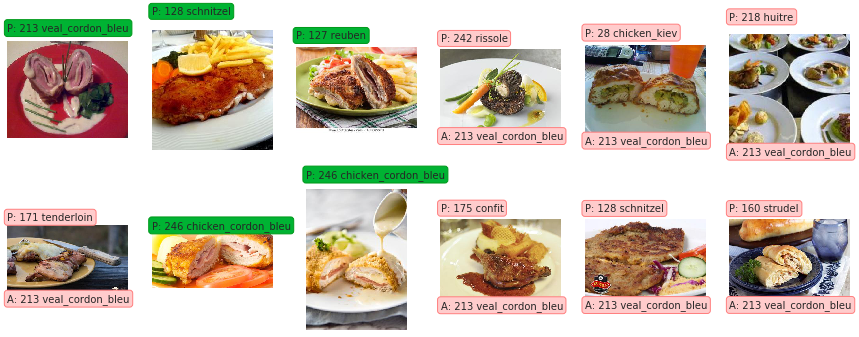

In [139]:
worst_classes299 = np.argsort(val_error_rates299)
this_class299 = worst_classes299[-3]
show_images_prediction(page=0, true_label=str(this_class299), model_type='299')

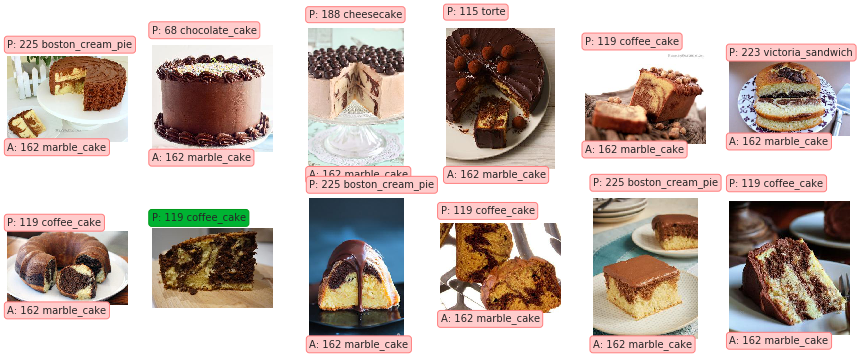

In [123]:
show_images_prediction(page=0, true_label=str(this_class), model_type='ens')

## Heat maps

In [13]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer

In [14]:
model = load_model('cnnweights/299_irv2_419__reg5.0e-04_lr3.0e-03_do0.40-09-0.71.hdf5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


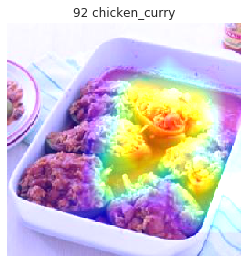

In [261]:
#  We want to make an array of the following heat maps to see what is successful and not successful in convolution.

In [21]:
plt.savefig('plots/overallheatmaps3.png', transparent=True)

<Figure size 432x288 with 0 Axes>

In [22]:
xtest3, ytest3 = next(test_generator)
xtest = np.append(xtest, xtest3, axis=0)
ytest = np.append(ytest, ytest3, axis=0)
key_list = list(test_generator.class_indices.keys())
val_list = list(test_generator.class_indices.values())

xtest, ytest = next(test_generator)
# preds = model.predict(xtest)
top_3 = np.argsort(preds, axis=1)[:, -3:]
argmax = np.argmax(preds, axis=1)
#     output = model.output[:, argmax]
truth = np.argmax(ytest, axis=1)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

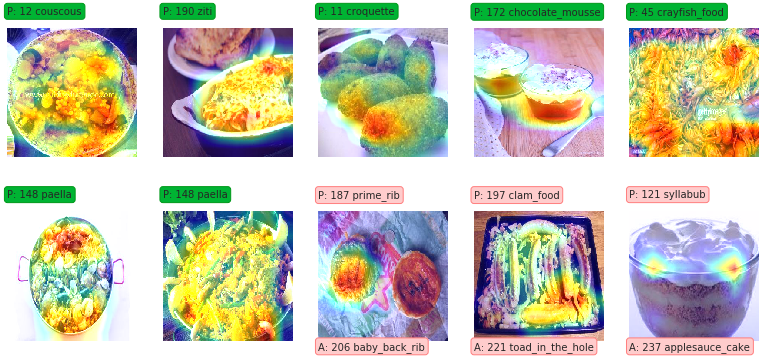

In [33]:
nrows = 2
ncols = 5
page_size = nrows*ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
fig.set_size_inches(12, 6)
# fig.patch.set_facecolor(None)
#fig.tight_layout()
#imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
page=0
start_i = page * page_size

for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.title.set_visible(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    
    if i < page_size-3:
        trueval = truth[np.isin(truth, top_3)==True][i]
        x=xtest[np.isin(truth, top_3)==True][i]
        value = argmax[np.isin(truth, top_3)==True][i]
        img = x
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        x = np.expand_dims(img, axis=0)  
        top_mapped= int(key_list[val_list.index(value)])        
        predicted = ix_to_class[top_mapped] # map to a string
        # predicted label
        ax.text(0, -50, 'P: ' + predicted, size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )
    
    else: 
        ec = (1, .5, .5)
        fc = (1, .8, .8)

        trueval = truth[np.isin(truth, top_3)==False][page_size-i-1]
        x=xtest[np.isin(truth, top_3)==False][page_size-i-1]
        img = x
        value = argmax[np.isin(truth, top_3)==False][page_size-i-1]
        x = np.expand_dims(img, axis=0)        
    
    
        top_mapped= int(key_list[val_list.index(value)])        
        predicted = ix_to_class[top_mapped] # map to a string
            #  ix_to_class[y_test[y_pred.index[start_i + i]]]


        # predicted label
        ax.text(0, -50, 'P: ' + predicted, size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )

        # true label
        ax.text(0, img.shape[0], 'A: ' + ix_to_class[int(key_list[val_list.index(trueval)])], size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )

    ### BACKTRACKING TO GET FEATURES IMPORTANT IN CLASSIFICATION ###
    output = model.output[:, value]
    last_conv_layer = model.get_layer('conv_7b')
    grads = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(1536):
        conv_layer_output_value[:, :, j] *= pooled_grads_value[j]
        
    ### HEATMAP CREATION ###
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0.)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cm.jet(heatmap)
    heatmap = heatmap[:,:,:3]
    
    ### SUMMING HEATMAP AND ORIGINAL IMAGE TOGETHER ### 
    hif = 0.5
    superimposed_img = heatmap * hif + img
    ax.imshow(superimposed_img, aspect='equal')

fig.subplots_adjust(left=None, wspace=0.2, hspace=0.1)
# fig.patch.set_facecolor('xkcd:mint green')
fig.savefig('plots/overallheatmaps4_2.png', transparent=True)
fig.show()

## def show_heatmaps(page=0, true_label=None):
    xtest, ytest = next(test_generator)
    preds = model.predict(xtest)
    top_3 = np.argsort(preds, axis=1)[:, -3:]
    argmax = np.argmax(preds, axis=1)
#     output = model.output[:, argmax]
    truth = np.argmax(ytest, axis=1)
    
    
    nrows = 2
    ncols = 5
    page_size = nrows*ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    #imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
    start_i = page * page_size
    for i, ax in enumerate(axes.flat):
        x=xtest[i]
        img = x

        im = ax.imshow(img, aspect='equal')
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
                
        x = np.expand_dims(img, axis=0)        
        value = argmax[i]
        predicted = ix_to_class[argmax[i]] # map to a string
        
        match = truth[i] in top_3[i]
                #  ix_to_class[y_test[y_pred.index[start_i + i]]]
        ec = (1, .5, .5)
        fc = (1, .8, .8)
        if match:
            ec = (0, .6, .1)
            fc = (0, .7, .2)
        # predicted label
        ax.text(0, -50, 'P: ' + predicted, size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )
        if not match:
            # true label
            ax.text(0, img.shape[0], 'A: ' + ix_to_class[truth[i]], size=10, rotation=0,
                ha="left", va="top",
                 bbox=dict(boxstyle="round",
                       ec=ec,
                       fc=fc,
                       )
                 )
    plt.subplots_adjust(left=0, wspace=0.2, hspace=0.2)
    plt.savefig('plots/overallheatmaps.png')
    plt.show()

## Confusion matrix

In [648]:
cnf_matrix

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 53,  0, ...,  0,  0,  0],
       [ 0,  0, 44, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 45,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 49]])

In [ ]:
classes = 

Confusion matrix, without normalization
[[51  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 49]]


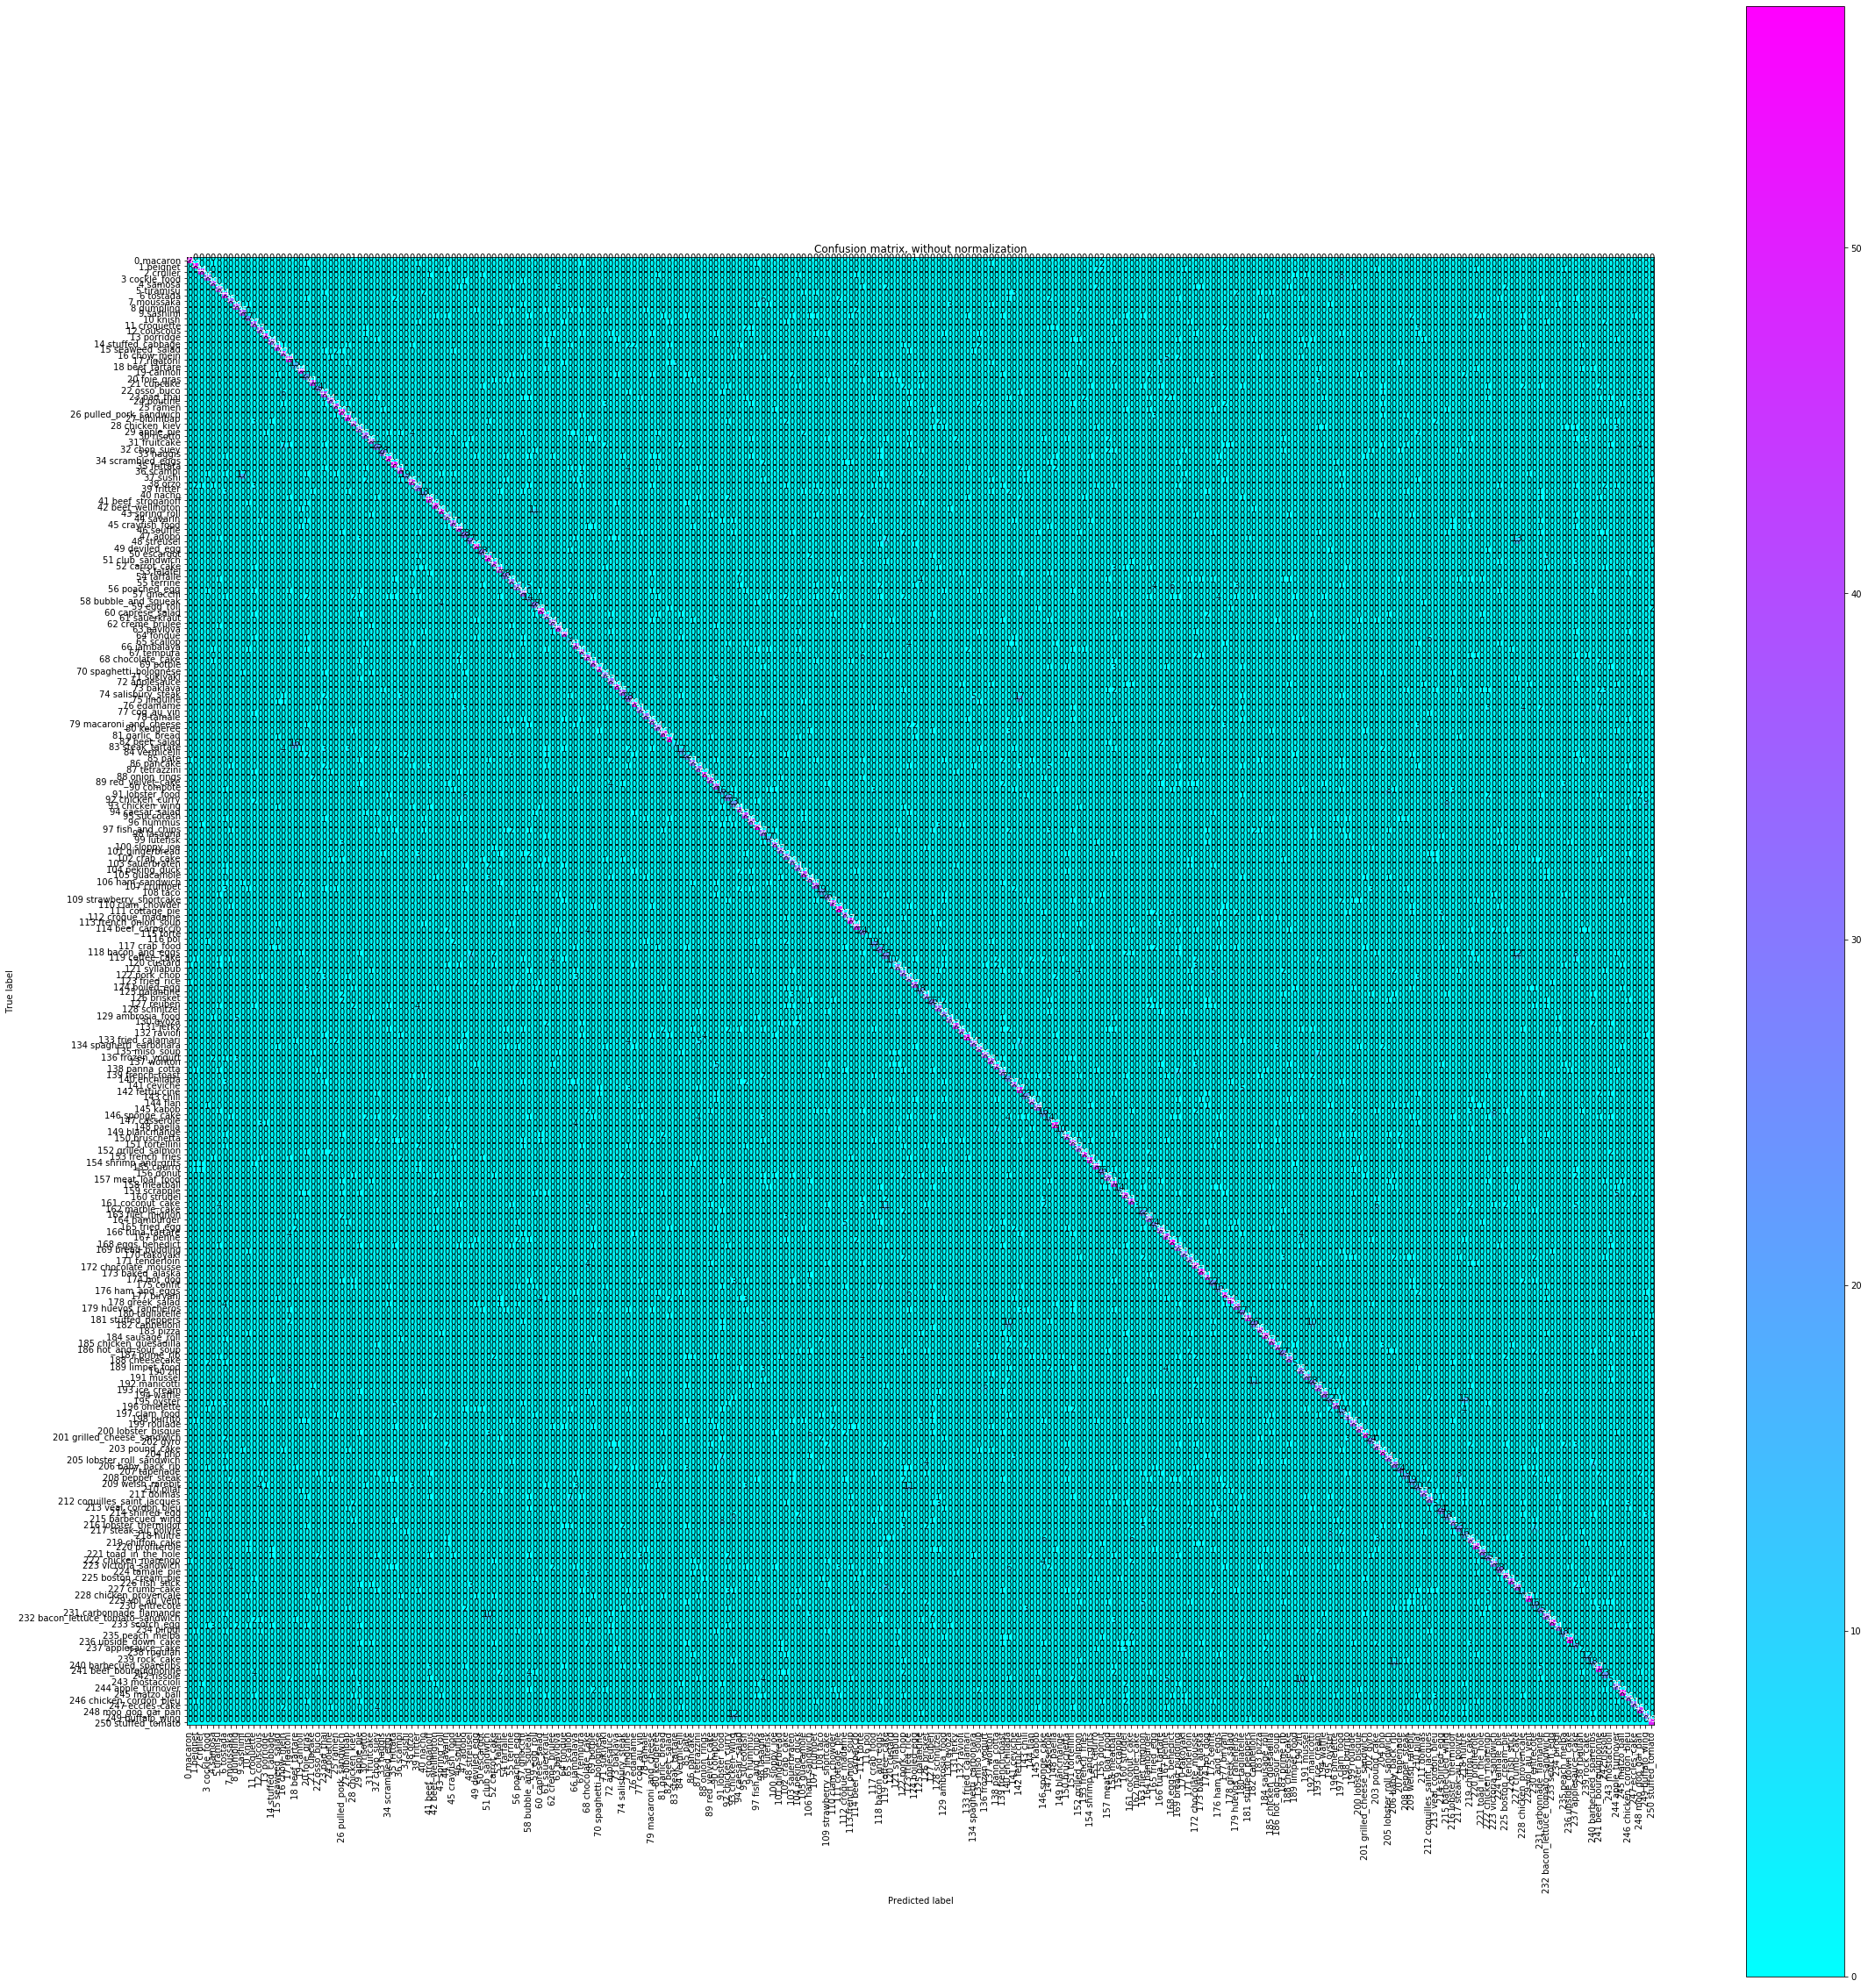

In [655]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, pred_data['guess'])
np.set_printoptions(precision=2)

class_names = [ix_to_class[i] for i in range(251)]

plt.figure()
fig = plt.gcf()
fig.set_size_inches(32, 32)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      cmap=plt.cm.cool)
plt.savefig('plots/confusionmatrix.png')
plt.show()

In [653]:
class_names

NameError: name 'class_names' is not defined

In [657]:
cnf_matrix

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 53,  0, ...,  0,  0,  0],
       [ 0,  0, 44, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 45,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 49]])

In [670]:
ax.imshow(cnf_matrix, vmin=1, vmax=5)

In [672]:
import matplotlib.colors as colors

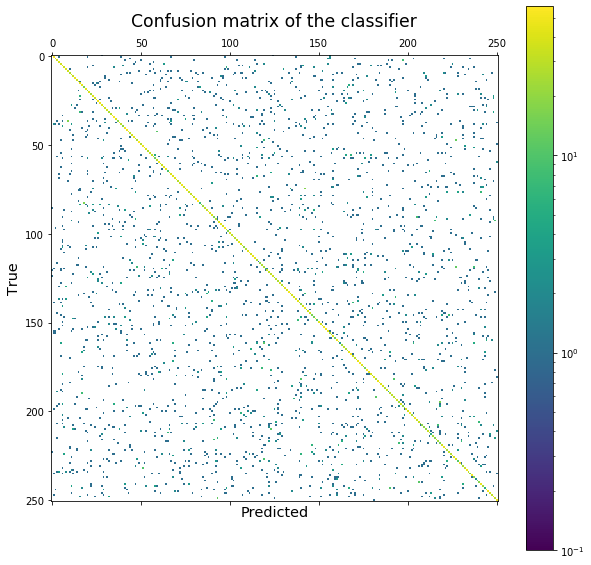

In [686]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
norm=colors.LogNorm(vmin=cnf_matrix.min(), vmax=cnf_matrix.max())


cax = ax.matshow(cnf_matrix, norm=norm, vmin=0.1)

plt.title('Confusion matrix of the classifier', fontdict={'fontsize': 'xx-large'})
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontdict={'fontsize': 'x-large'})
plt.ylabel('True', fontdict={'fontsize': 'x-large'})
plt.savefig('plots/confusionmatrix_simple.png')
plt.show()

In [ ]:
fig.colorbar(cax)

# Final model History + eval

In [45]:
final_model = load_model('cnnweights/299_irv2_419__reg5.0e-04_lr3.0e-03_do0.40-09-0.71.hdf5')

In [ ]:
final_model.